# India Suicide Data Analysis

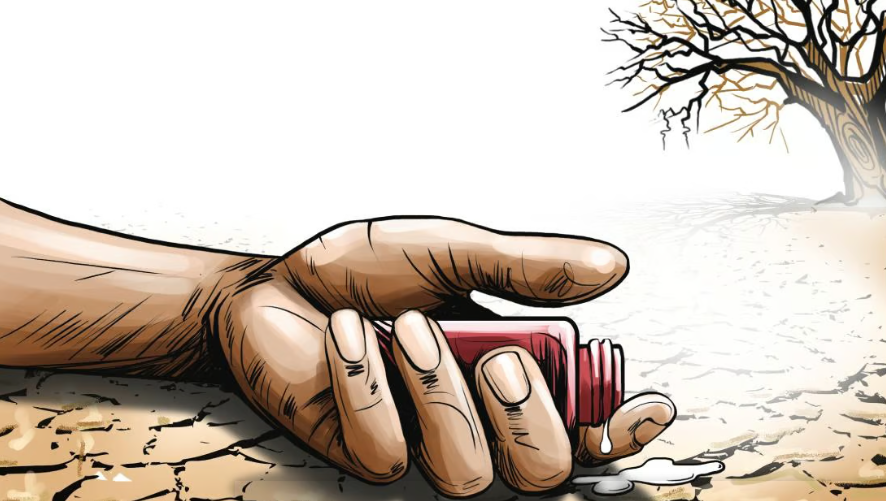

In [4]:
# Importing dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [1]:
#Importing Dataset

In [16]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
sns.set()

In [7]:
#Top rows
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [8]:
#Matrix shape
df.shape

(237519, 7)

In [9]:
#details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [10]:
#Null check
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# Exploratory Data Analysis

In [11]:
# Year wise total cases

In [13]:
df1 = df.groupby('Year')['Total'].sum()
df1

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

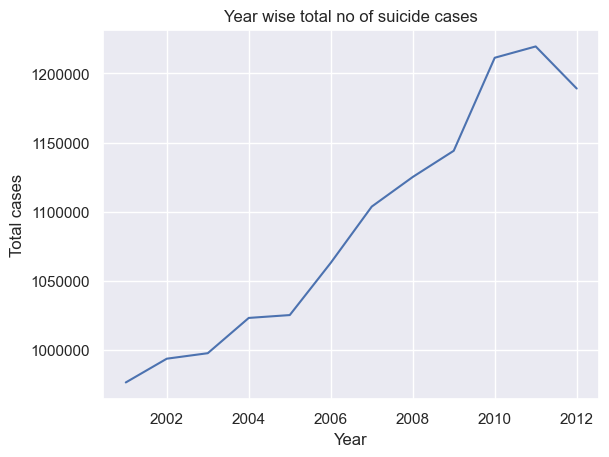

In [19]:
df1.plot()
plt.ticklabel_format(style='plain')
plt.xlabel('Year')
plt.ylabel('Total cases')
plt.title('Year wise total no of suicide cases')
plt.show()

In [20]:
# Gender Distribution

In [23]:
df2 = df.groupby('Gender')['Total'].sum()
df2

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

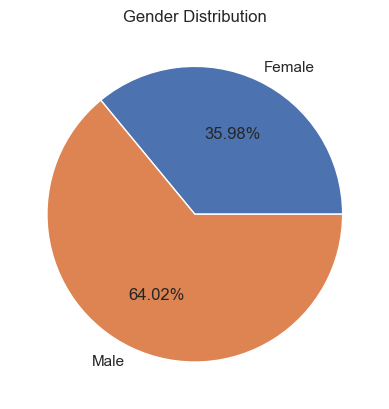

In [26]:
df2.plot(kind='pie',autopct = '%1.2f%%')
plt.ylabel(None)
plt.title('Gender Distribution')
plt.show()

In [27]:
# Top 3 States

In [33]:
# excluding all india, ut, states
df3 = df[(df["State"]!="Total (States)")&(df["State"]!="Total (Uts)")&(df["State"]!="Total (All India)") ]

In [39]:
df4 = df3.groupby('State')['Total'].sum().sort_values(ascending=False).head()
df4

State
Maharashtra       901945
West Bengal       849936
Tamil Nadu        818691
Andhra Pradesh    814059
Karnataka         734825
Name: Total, dtype: int64

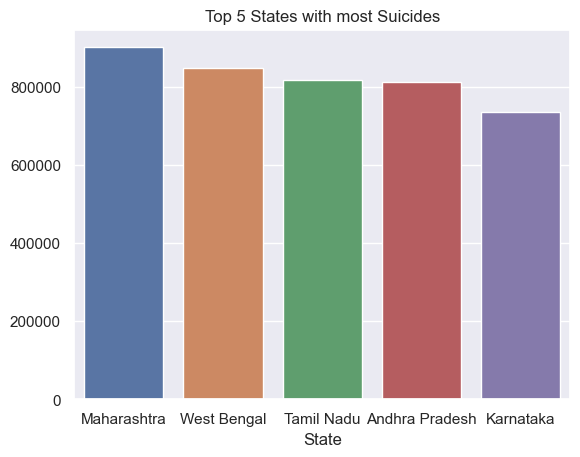

In [42]:
sns.barplot(x = df4.index, y=df4.values)
plt.title('Top 5 States with most Suicides')
plt.show()

In [44]:
# Cases over time wrt Gender

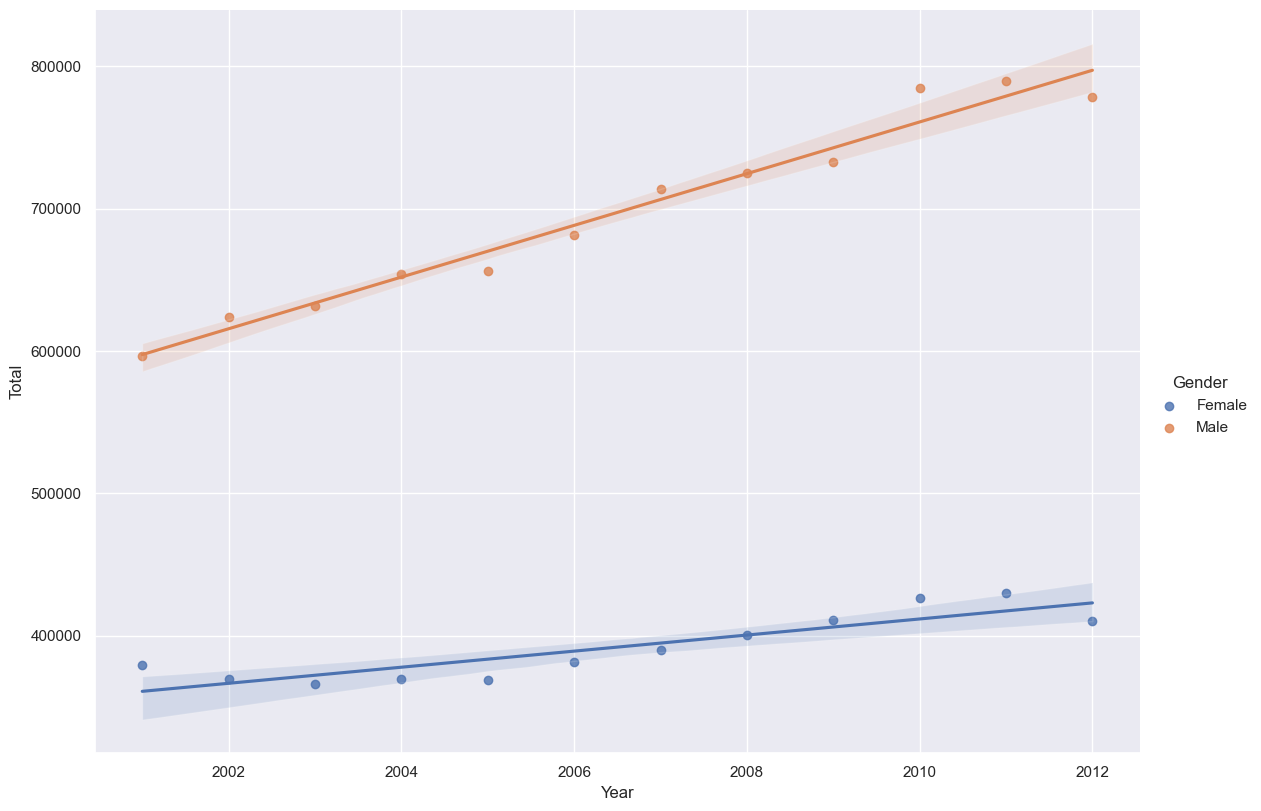

In [43]:
grouped_year = df.groupby(["Year","Gender"])["Total"].sum()
grouped_year = pd.DataFrame(grouped_year).reset_index()
# grouped_year
sns.lmplot(x="Year", y="Total", hue="Gender", data=grouped_year,height=8.27, aspect=11.7/8.27);

In [45]:
# Top reasons for suicide

In [52]:
df5 = df.groupby('Type_code')['Total'].sum().sort_values(ascending = False)
df5

Type_code
Education_Status        4367793
Social_Status           4367793
Means_adopted           1455931
Causes                  1440974
Professional_Profile    1439243
Name: Total, dtype: int64

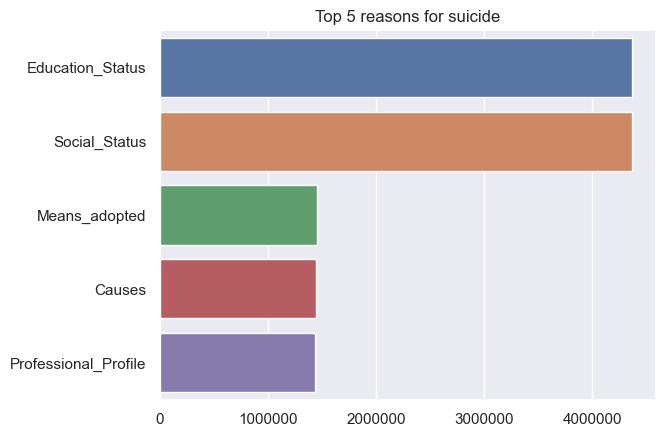

In [60]:
sns.barplot(x = df5.values, y = df5.index)
plt.ticklabel_format(style='plain', axis = 'x')
plt.ylabel(None)
plt.title('Top 5 reasons for suicide')
plt.show()

In [62]:
# Suicide among Social status

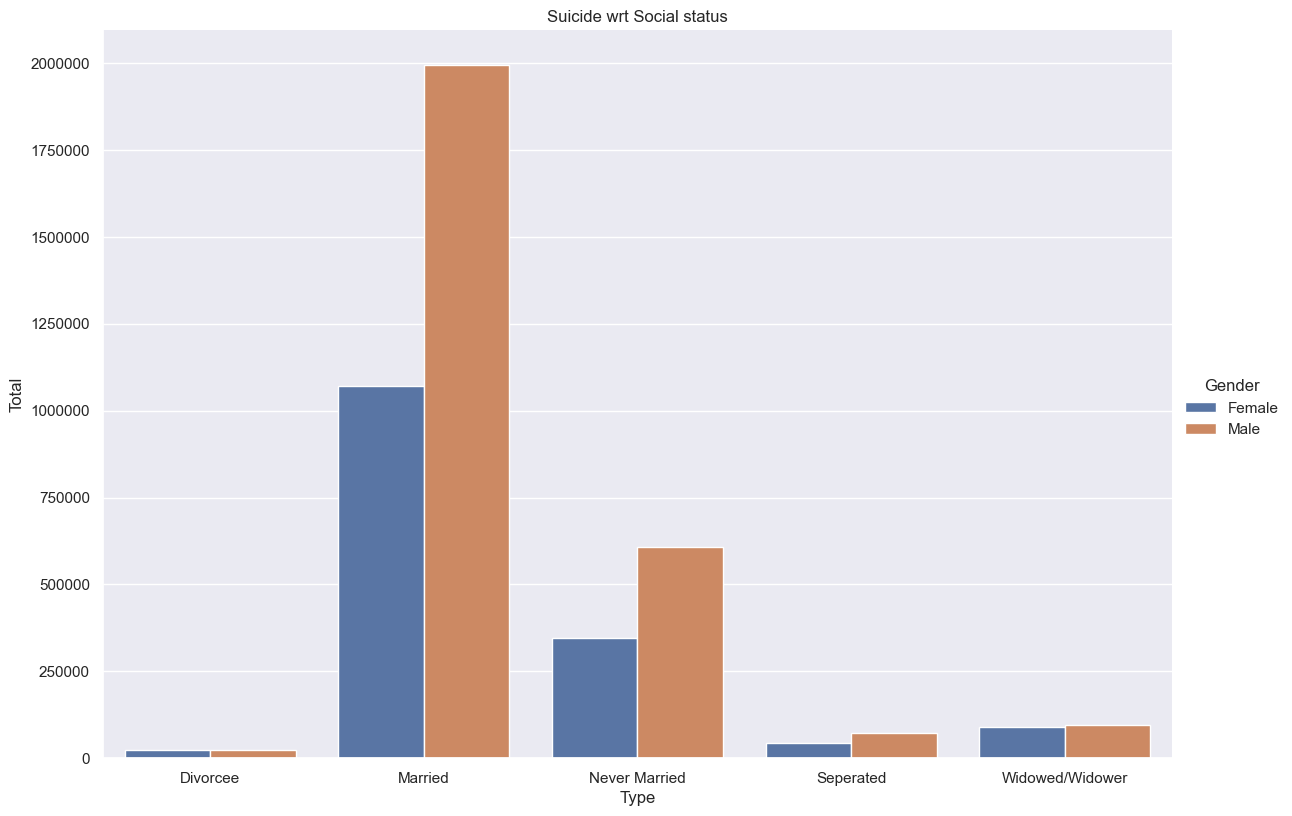

In [76]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27)
plt.title('Suicide wrt Social status')
plt.ticklabel_format(style='plain', axis = 'y')
plt.show()

In [67]:
# Suicide cases dist among different Educational classes

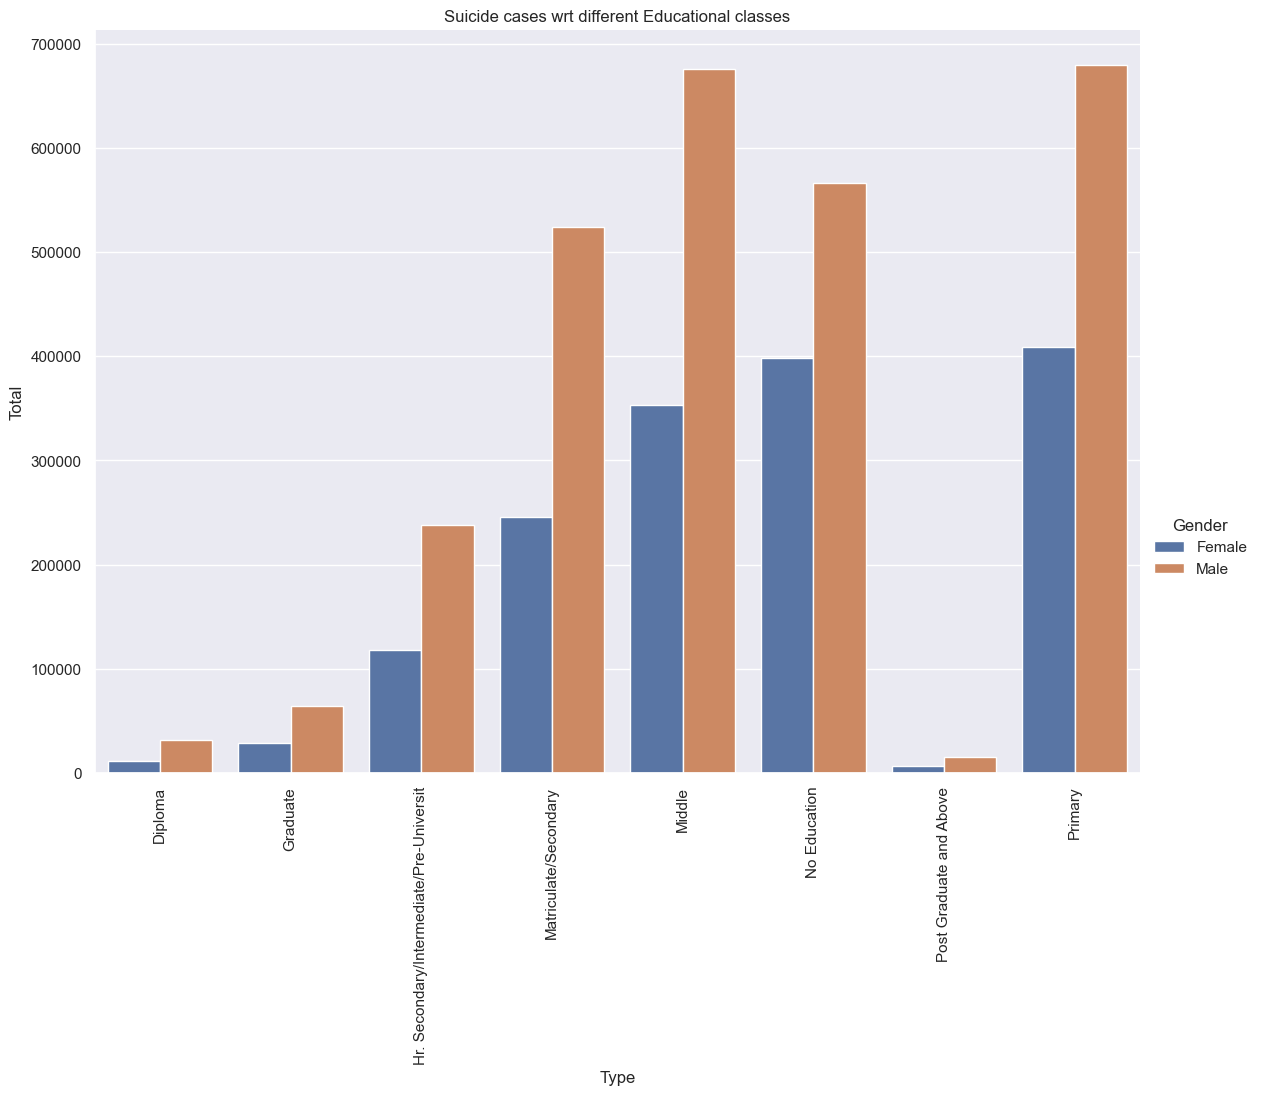

In [73]:
filter_edu_status = pd.DataFrame(df[df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_edu_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)
plt.title('Suicide cases wrt different Educational classes')
plt.show()

In [ ]:
# Suicide cases distribution among different Professional  profiles

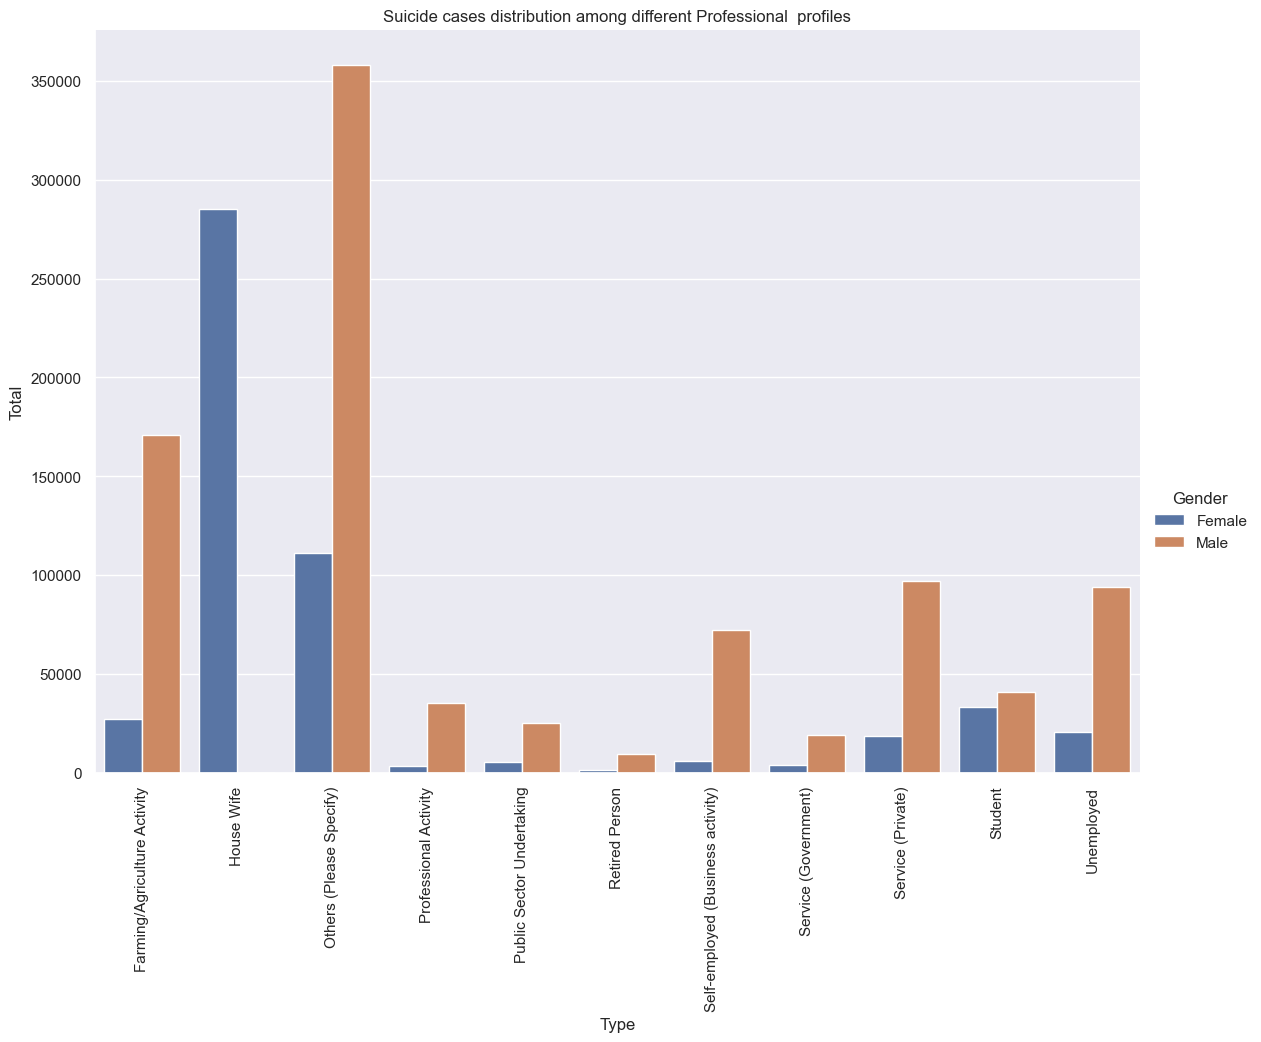

In [78]:
filter_pro_status = pd.DataFrame(df[df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_pro_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)
plt.title('Suicide cases distribution among different Professional  profiles')
plt.show()

In [ ]:
# Age group wise Suicide cases

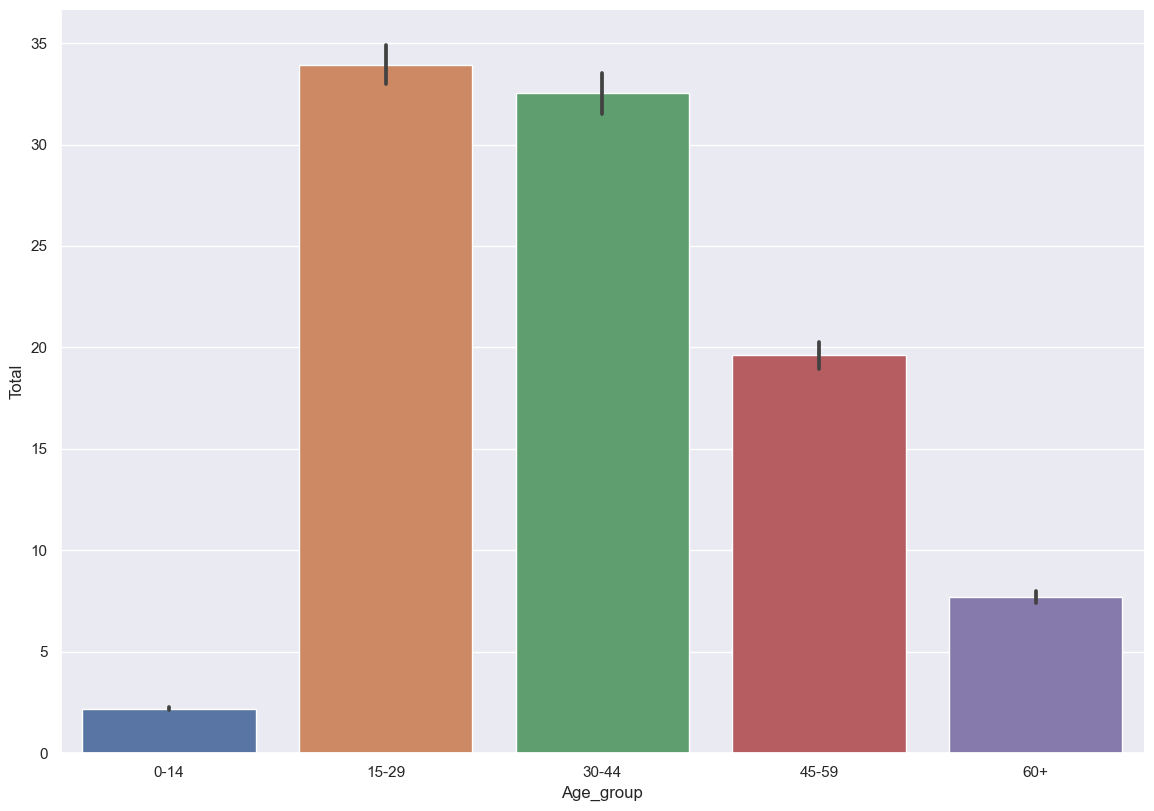

In [79]:
# age group 0-100+ encapsulates all the remaining age groups, hence it would make sense to drop it
filter_age = df[df["Age_group"]!="0-100+"]
sns.catplot(x="Age_group", y="Total", kind="bar", data=filter_age,height=8.27, aspect=11.7/8.27);